In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import Random
import seaborn as sns

import moviepy.editor as mpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

Датасет: https://www.kaggle.com/datasets/gregorut/videogamesales

In [2]:
df = pd.read_csv("vgsales.csv", sep=",")

# Вывод данных

Первые несколько строк таблицы:

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Всего 16.5 тысяч записей и 11 колонок

5 игры с конца топа:

In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Уникальные значения некоторых столбцов:

In [6]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [8]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<Axes: >

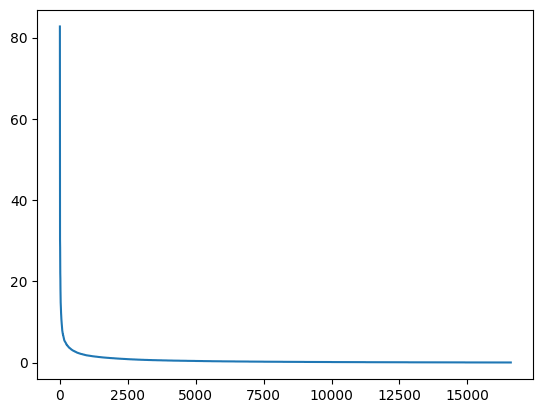

In [9]:
df.Global_Sales.plot()

In [10]:
df[df.Global_Sales > 80]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Существует всего одна игра из датасета, продажи которой выше 80 единиц. Она находится на первом месте

In [11]:
df[df.Global_Sales < 1].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2081,2083,Dead Space 3,X360,2013.0,Action,Electronic Arts,0.64,0.28,0.00,0.08,0.99
2082,2084,Phoenix Wright: Ace Attorney,DS,2005.0,Adventure,Capcom,0.49,0.07,0.39,0.05,0.99
2083,2085,NFL Fever 2002,XB,2000.0,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99
2084,2086,The Simpsons: Hit & Run,GC,2003.0,Racing,Vivendi Games,0.77,0.20,0.00,0.03,0.99
2085,2087,Littlest Pet Shop: Winter,DS,2008.0,Simulation,Electronic Arts,0.59,0.31,0.00,0.10,0.99


In [12]:
len(df[df.Global_Sales < 1])

14517

При этом у 14.5 тысяч игр продажи меньше единицы

Анимация графика, отображающая количество игр разной категории продаж:

In [13]:
def plot_chart(i):
    df.Global_Sales.plot()
    plt.ylim([0, i])

for i in range(80, 0, -1):
    fig = plt.figure()
    plot_chart(i)
    fig.savefig(f"figures/{i}.png")
    plt.close()

figures_lst = [f"figures/{i}.png" for i in range(80, 10, -1)]

for i in range(10, 0, -1):
    for k in range((11-i)*2):
        figures_lst.append(f"figures/{i}.png")

gif_name = 'global_sales.gif'
fps = 0.01
clip = mpy.ImageSequenceClip(figures_lst, fps=fps)
clip.write_gif(f'{gif_name}', fps=fps)

MoviePy - Building file global_sales.gif with imageio.


<img src="global_sales.gif" width="420" align="center">

Топ игр от издателя Nintendo по продажам:

In [14]:
df[df.Publisher == "Nintendo"].sort_values(by=["Global_Sales"], ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Топ игр от издателя Electronic Arts по продажам:

In [15]:
df[df.Publisher == "Electronic Arts"].sort_values(by=["Global_Sales"], ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34


Глобальные продажи по годам:

In [16]:
print(df.Year.dropna().unique().min())
print(df.Year.dropna().unique().max())

1980.0
2020.0


In [17]:
df[df.Year > 2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [18]:
years_sales = dict()
print("Global_Sales:")
for year in list(range(1980, 2018)) + [2020]:
    years_sales[year] = df[df.Year == year].iloc[0].Global_Sales
    
    print(f"{year}:", df[df.Year == year].iloc[0].Global_Sales)

Global_Sales:
1980: 4.31
1981: 4.5
1982: 7.81
1983: 3.2
1984: 28.31
1985: 40.24
1986: 6.51
1987: 4.38
1988: 17.28
1989: 30.26
1990: 20.61
1991: 4.61
1992: 11.18
1993: 10.55
1994: 9.3
1995: 5.15
1996: 31.37
1997: 10.95
1998: 14.64
1999: 23.1
2000: 6.39
2001: 14.98
2002: 16.15
2003: 7.2
2004: 20.81
2005: 24.76
2006: 82.74
2007: 22.72
2008: 35.82
2009: 33.0
2010: 21.82
2011: 14.76
2012: 14.03
2013: 21.4
2014: 11.98
2015: 14.24
2016: 4.77
2017: 0.03
2020: 0.29


С отсортированными значения продаж:

In [19]:
pd.DataFrame({k: v for k, v in sorted(years_sales.items(), key=lambda v: v[1], reverse=True)}, index=["Global_Sales"]).T

,Global_Sales
2006,82.74
1985,40.24
2008,35.82
2009,33.00
1996,31.37
1989,30.26
1984,28.31
2005,24.76
1999,23.10
2007,22.72


# Очистка данных

In [20]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Создам копию датасета, чтобы не повредить его:

In [21]:
df_work = df.copy()

Общий объём данных позволяет или удалить строки с недостающими данными, или заполнить эти значения медианой

В строках с na вместо года можно заменить недостающие значения медианой:

In [22]:
df_work.Year.fillna(df.Year.median(), inplace=True)

In [23]:
df_work.dropna(inplace=True)

In [24]:
df_work.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Приведение в числовую форму

Колонки "Platform", "Genre" и "Publisher" можно привести в числовую форму путём замены каждого уникального значения на число.  
Я воспользуюсь порядковым кодированием, а именно, заменю все значения числом от 1 до количества уникальных значений в колонке

In [25]:
platform_values = list(df_work.Platform.unique())
genre_values = list(df_work.Genre.unique())
publisher_values = list(df_work.Publisher.unique())

In [26]:
print(len(platform_values))
print(len(genre_values))
print(len(publisher_values))

31
12
578


In [27]:
platform_nums = list(range(1, len(platform_values) + 1))
genre_nums = list(range(1, len(genre_values) + 1))
publisher_nums = list(range(1, len(publisher_values) + 1))

Чтобы между столбцами не было ненужной зависимости, их нужно перемешать:

In [28]:
Random(0).shuffle(platform_nums)
Random(0).shuffle(genre_nums)
Random(0).shuffle(publisher_nums)

In [29]:
platform_dict = dict(zip(platform_values, platform_nums))
genre_dict = dict(zip(genre_values, genre_nums))
publisher_dict = dict(zip(publisher_values, publisher_nums))

In [30]:
df_work['Platform'] = df_work['Platform'].map(platform_dict)
df_work['Genre'] = df_work['Genre'].map(genre_dict)
df_work['Publisher'] = df_work['Publisher'].map(publisher_dict)

In [31]:
df_work.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,4,2006.0,2,384,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,10,384,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,4,2008.0,9,384,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,4,2009.0,2,384,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,20,1996.0,6,384,11.27,8.89,10.22,1.00,31.37


Столбец с названием игр можно смело удалить, так как все значения в нём уникальные, и зависимость с другими столбцами незначительна

In [32]:
df_work.drop(["Name"], axis=1, inplace=True)

Итоговый датасет:

In [33]:
df_work.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,4,2006.0,2,384,41.49,29.02,3.77,8.46,82.74
1,2,11,1985.0,10,384,29.08,3.58,6.81,0.77,40.24
2,3,4,2008.0,9,384,15.85,12.88,3.79,3.31,35.82
3,4,4,2009.0,2,384,15.75,11.01,3.28,2.96,33.00
4,5,20,1996.0,6,384,11.27,8.89,10.22,1.00,31.37


# Статистические характеристики

In [34]:
df_work.describe()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,14.577449,2006.414510,5.735067,259.146735,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,9.431195,5.788794,3.221184,161.686089,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1.000000,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,6.000000,2003.000000,3.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,18.000000,2007.000000,5.000000,264.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,23.000000,2010.000000,8.000000,384.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,31.000000,2020.000000,12.000000,578.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [35]:
list(platform_dict.keys())[list(platform_dict.values()).index(9)]

'WS'

Медианная платформа - "WS"

In [36]:
list(genre_dict.keys())[list(genre_dict.values()).index(3)]

'Misc'

Медианный жанр - "Misc", разное

In [37]:
list(publisher_dict.keys())[list(publisher_dict.values()).index(3)]

'Marvelous Interactive'

Медианный издатель - "Marvelous Interactive"

Медианное значение - то, значений меньше и больше которого  одинаковое количество

Матрица корреляции между колонками датасета:

In [38]:
df_work.corr()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.169574,0.176825,0.146234,0.029357,-0.401236,-0.379068,-0.268056,-0.333081,-0.427391
Platform,0.169574,1.000000,-0.168743,0.133087,0.033473,-0.081299,-0.072225,0.073516,-0.100905,-0.063767
Year,0.176825,-0.168743,1.000000,0.007884,-0.080256,-0.091157,0.005930,-0.169495,0.040949,-0.074710
Genre,0.146234,0.133087,0.007884,1.000000,-0.002866,-0.031676,-0.026933,0.016546,-0.044891,-0.027507
Publisher,0.029357,0.033473,-0.080256,-0.002866,1.000000,0.023085,0.011775,0.058715,-0.011792,0.026212
NA_Sales,-0.401236,-0.081299,-0.091157,-0.031676,0.023085,1.000000,0.767672,0.449864,0.634651,0.941036
EU_Sales,-0.379068,-0.072225,0.005930,-0.026933,0.011775,0.767672,1.000000,0.435658,0.726326,0.902817
JP_Sales,-0.268056,0.073516,-0.169495,0.016546,0.058715,0.449864,0.435658,1.000000,0.290150,0.611893
Other_Sales,-0.333081,-0.100905,0.040949,-0.044891,-0.011792,0.634651,0.726326,0.290150,1.000000,0.748260
Global_Sales,-0.427391,-0.063767,-0.074710,-0.027507,0.026212,0.941036,0.902817,0.611893,0.748260,1.000000


Чем выше значение, тем больше зависимость характеристик

Для большей наглядности нужна тепловая карта корреляции:

<Axes: >

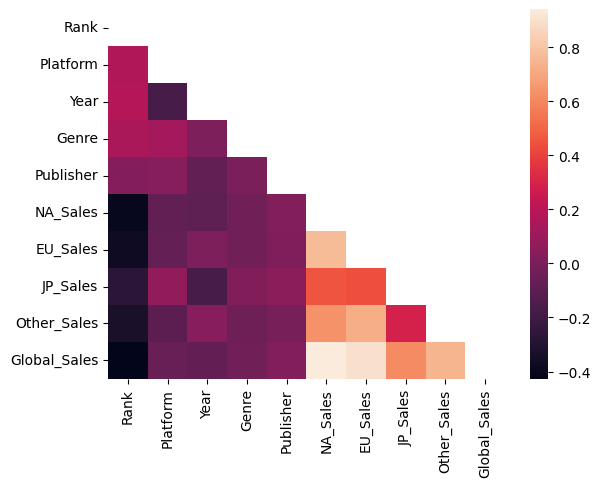

In [39]:
upper_matrix = np.triu(df_work.corr())
sns.heatmap(df_work.corr(), annot=True, mask=upper_matrix)

Исходя из неё, наибольшая положительная зависимость у столбцов с продажами, а наименьшая положительная - у ранга с продажами, а также у платформы совместно с годом и продажами в Японии совместно с годом

Для платформы и жанра можно отобразить распределение количества игр для каждой платформы по оригинальному датасету:

<Axes: xlabel='Platform', ylabel='Count'>

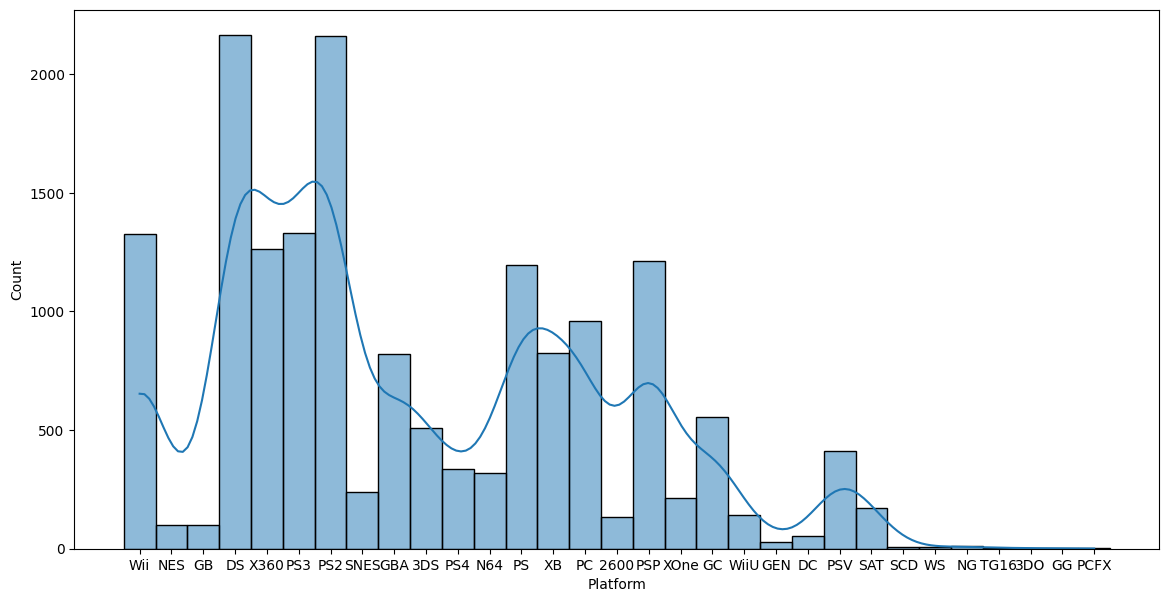

In [40]:
fig =  plt.figure(figsize=(14, 7))
sns.histplot(df['Platform'], kde=True)

<Axes: xlabel='Genre', ylabel='Count'>

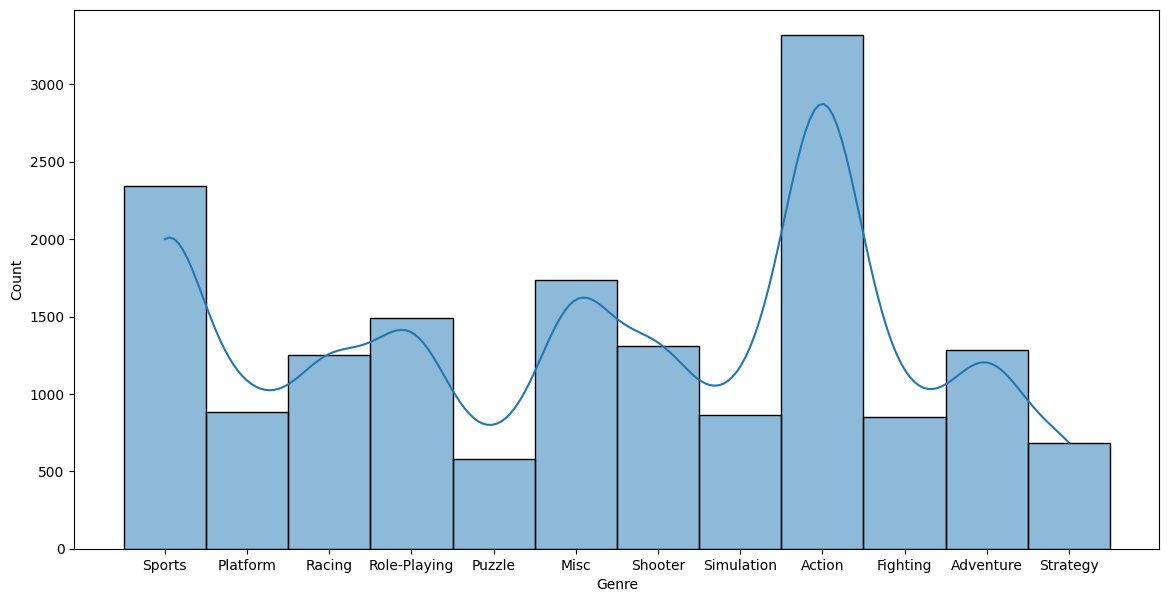

In [41]:
fig =  plt.figure(figsize=(14, 7))
sns.histplot(df['Genre'], kde=True)

Для платформы ситуация сложнее. Можно тоже отобразить распределение, но уже по числовому варианту датасета. Чтобы его проанализировать, нужно составить срезы по экстремумам и сопоставить издателей с номерами с помощью словаря publisher_dict

<Axes: xlabel='Publisher', ylabel='Count'>

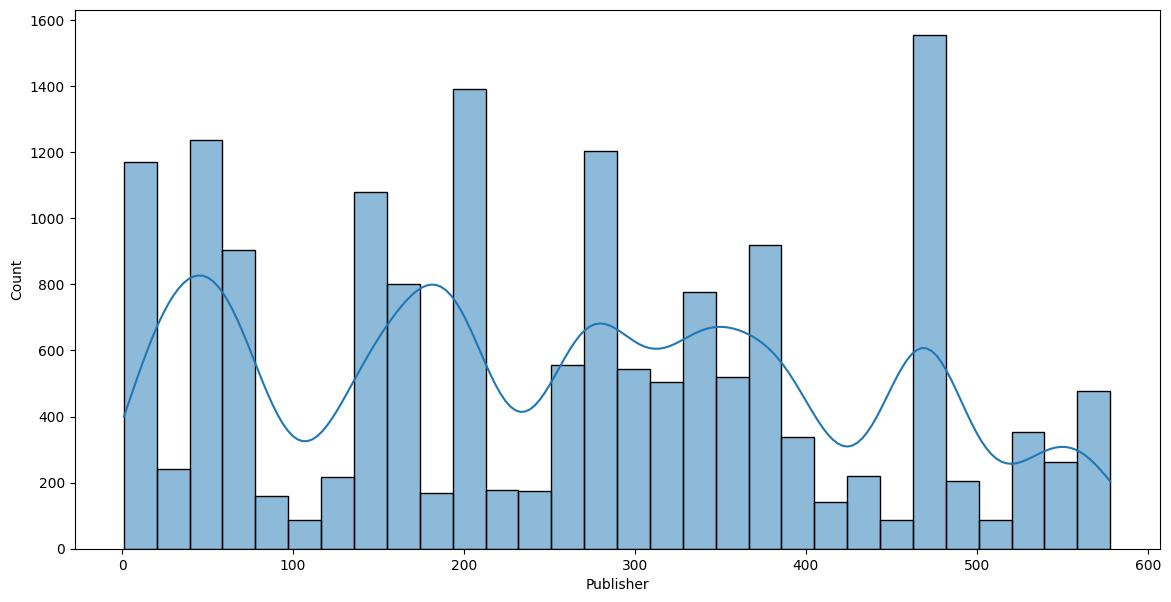

In [42]:
fig =  plt.figure(figsize=(14, 7))
sns.histplot(df_work['Publisher'], kde=True)

По кривой здесь видны:
- Глобальный максимум чуть меньше 500
- Приблизительно 3 глобальных минимума со значениями в окрестностях 100, 250 и 510
- 6 локальных максимумов
- 5 локальных минимумов

In [43]:
def publisher_by_index(i):
    return list(publisher_dict.keys())[list(publisher_dict.values()).index(i)]

In [44]:
pbhr_local_maxs = [[publisher_by_index(i) for i in range(40, 61)],
        [publisher_by_index(i) for i in range(180, 201)],
        [publisher_by_index(i) for i in range(270, 291)],
        [publisher_by_index(i) for i in range(340, 381)],
        [publisher_by_index(i) for i in range(470, 491)],
        [publisher_by_index(i) for i in range(540, 560)]
       ]
pbhr_local_mins = [[publisher_by_index(i) for i in range(62, 180)],
        [publisher_by_index(i) for i in range(202, 270)],
        [publisher_by_index(i) for i in range(292, 340)],
        [publisher_by_index(i) for i in range(382, 470)],
        [publisher_by_index(i) for i in range(492, 540)]]

pbhr_global_maxs = [publisher_by_index(i) for i in range(465, 485)]
pbhr_global_mins = [[publisher_by_index(i) for i in range(99, 116)],
                    [publisher_by_index(i) for i in range(450, 466)],
                    [publisher_by_index(i) for i in range(500, 515)]
                   ]

Здесь глобальные и локальные экстремумы могут пересекаться ввиду сильного сглаживания распределения. Также, крайние значения не были взяты. Можно записать их в отдельный список:

In [45]:
pbhr_other_values = [[publisher_by_index(i) for i in range(1, 40)],
                     [publisher_by_index(i) for i in range(562, 579)]
                    ]

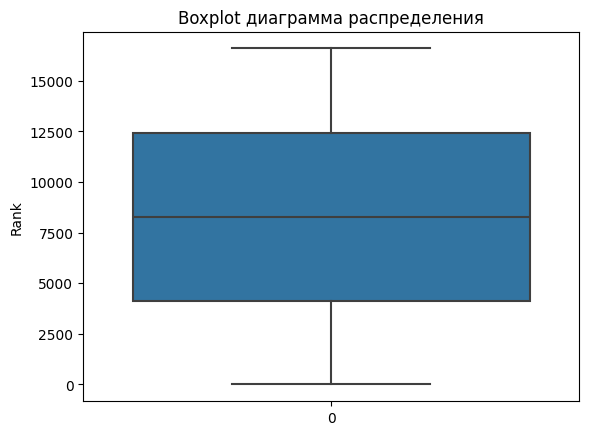

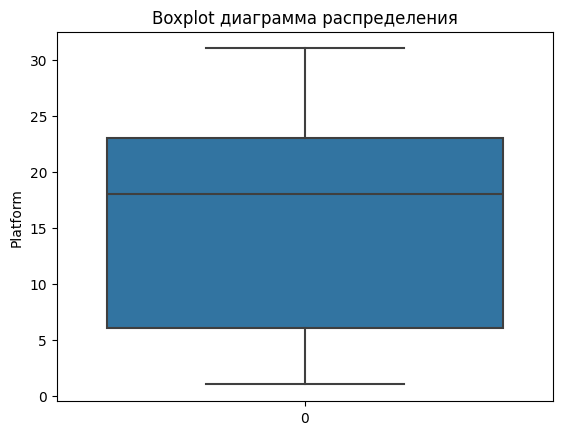

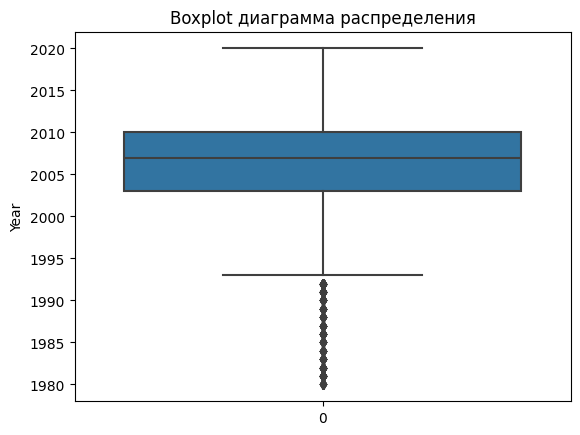

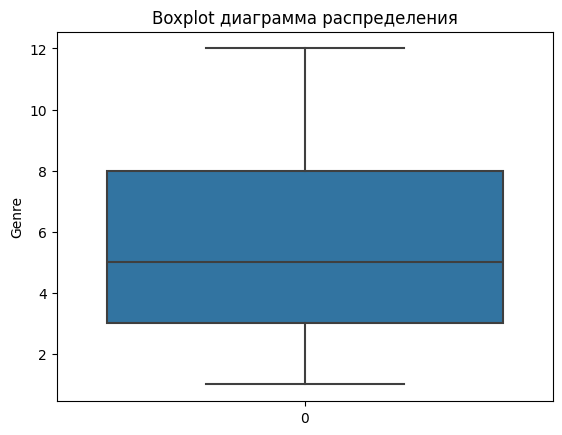

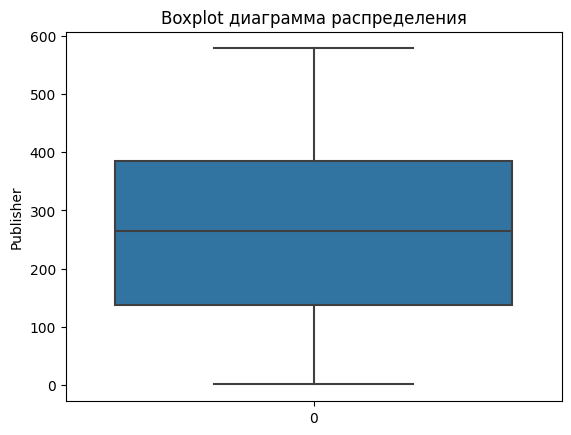

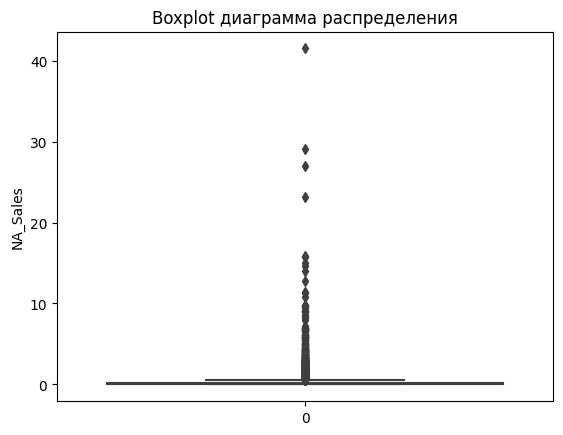

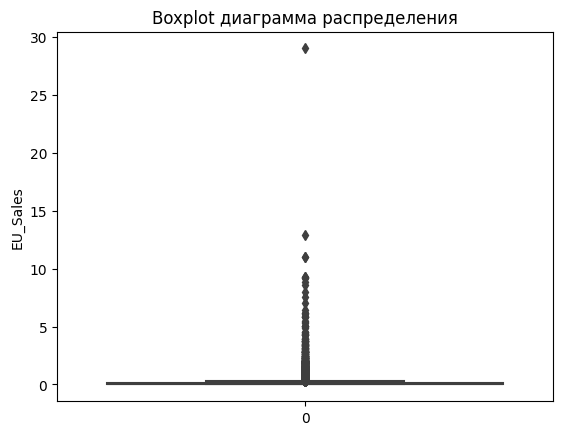

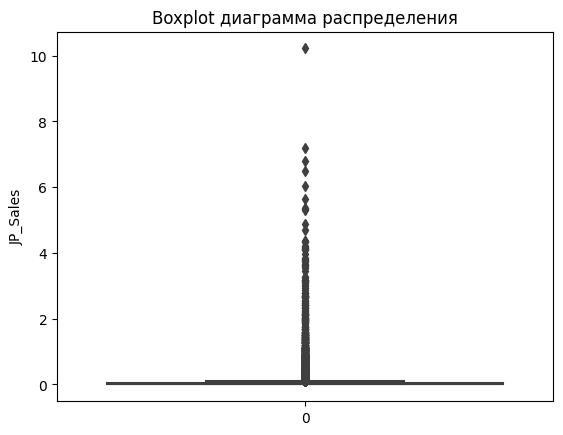

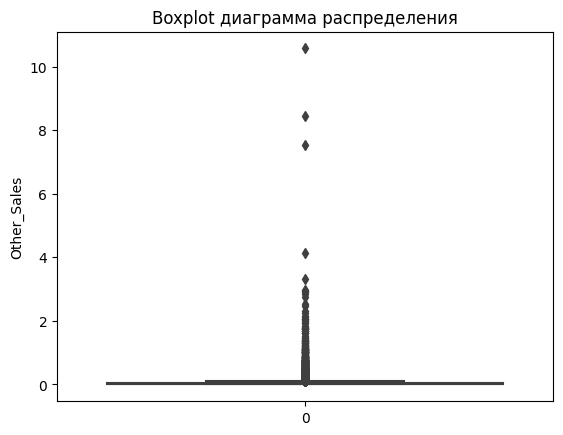

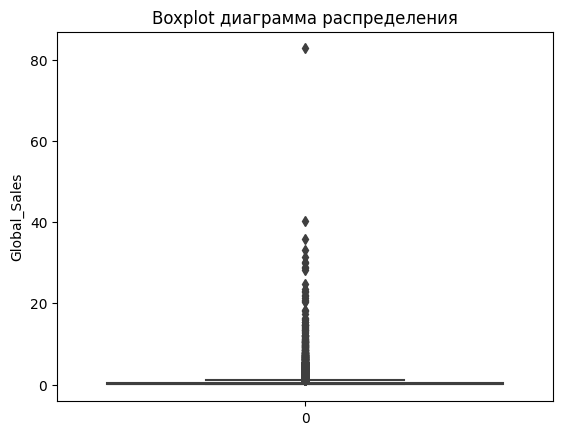

In [46]:
for i in df_work.columns:
    sns.boxplot(df_work[i])
    plt.ylabel(f"{i}")
    plt.title('Boxplot диаграмма распределения')
    plt.show()

У столбца с годом выбросы ниже значения 1993, а все столбцы с продажами содержат настолько неравномерные данные, что выбросами считается большая их часть

In [47]:
df[df.Year <= 1993]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
...,...,...,...,...,...,...,...,...,...,...,...
14507,14510,SimCity,PC,1988.0,Simulation,Maxis,0.00,0.02,0.00,0.01,0.03
14599,14602,Doom,PC,1992.0,Shooter,id Software,0.02,0.00,0.00,0.00,0.03
15867,15870,Strongest Tokyo University Shogi DS,DS,1985.0,Action,Mycom,0.00,0.00,0.02,0.00,0.02
16073,16076,Empire Deluxe,PC,1992.0,Strategy,New World Computing,0.01,0.00,0.00,0.00,0.01


С годом это 365 строк

Пример распределения одного из столбцов с продажами:

<Axes: xlabel='NA_Sales', ylabel='Count'>

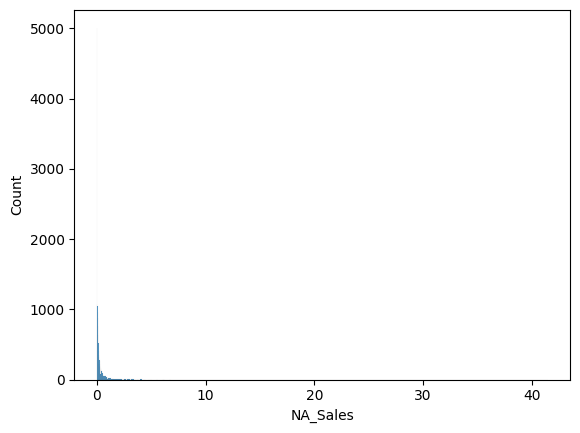

In [48]:
sns.histplot(df_work["NA_Sales"])

Это очень плохой вариант распределения. У него имеется так называемый long tail в левой части и небольшая часть данных с большим разбросом. Можно применить несколько методик для исправления таких данных.  
Для начала, логарифмирую весь столбец (вектор в данном случае):

In [49]:
log_NA_Sales = np.log1p(df_work["NA_Sales"])

<Axes: xlabel='NA_Sales', ylabel='Count'>

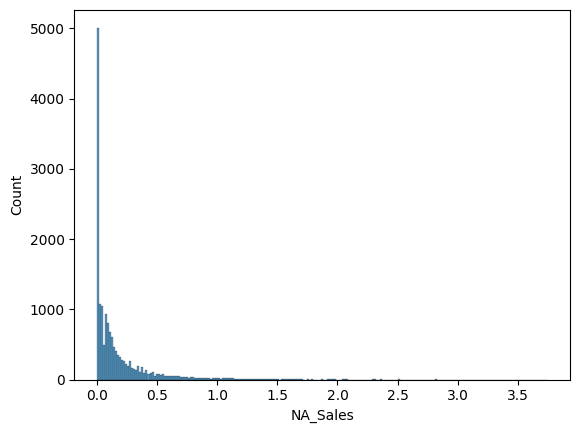

In [50]:
sns.histplot(log_NA_Sales)

Распределение заметно улучшилось. Но "хвост" остался.  
Теперь воспользуюсь методом IQR для удаления выбросов. Нужно взять 2 квантиля(первый и третий), посчитать интерквантильный размах (IQR) и взять только данные, подходящие под следующую формулу:

In [51]:
Q1 = log_NA_Sales.quantile(0.25)
Q3 = log_NA_Sales.quantile(0.75)
IQR = Q3 - Q1

no_otls_log_NA_Sales = log_NA_Sales[(log_NA_Sales >= Q1 - 1.5 * IQR) &
                                    (log_NA_Sales <= Q3 + 1.5 * IQR)]

In [52]:
len(no_otls_log_NA_Sales)

15146

Записей стало несколько меньше. Но общий объём позволяет. Стоит учитывать, что данные с лучшим распределением подвергаются более простому прогнозированию и анализу

<Axes: xlabel='NA_Sales', ylabel='Count'>

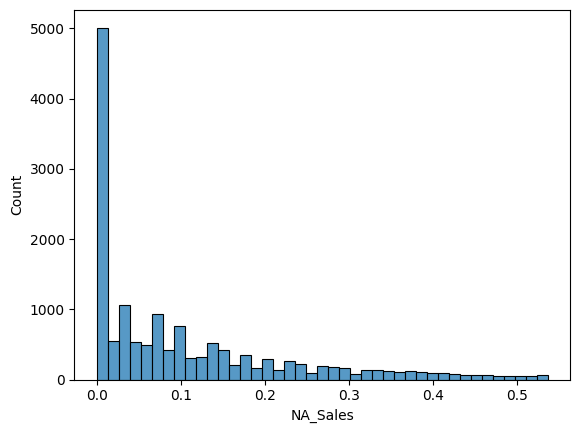

In [53]:
sns.histplot(no_otls_log_NA_Sales)

Теперь распределение выглядит более здоровым. Но значительная часть данных всё ещё близка к нулю. Возможно, для прогнозирования придётся использовть устойчивые к смещению модели

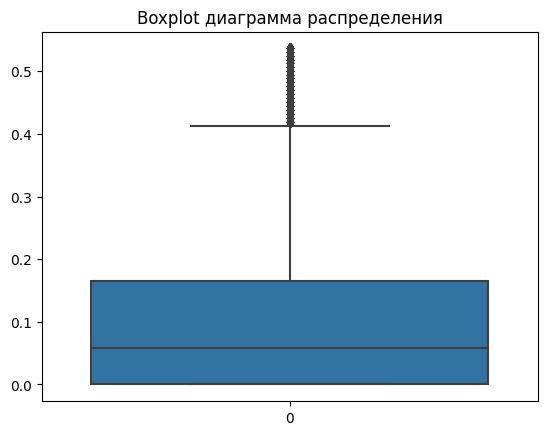

In [54]:
sns.boxplot(pd.Series(no_otls_log_NA_Sales.reset_index(drop=True)))
plt.title('Boxplot диаграмма распределения')
plt.show()

На boxplot диаграмме также заметны выбросы. Но теперь она хотя бы читается

А вот и причина. Ведь не все игры продаются во всех регионах

In [55]:
len(df.NA_Sales[df.NA_Sales == 0])

4499

Значит, можно посмотреть на все колонки продаж df_work и добавить новые столбцы с бинарным значением, есть ли продажи в категории

In [56]:
len(df_work.NA_Sales[df_work.NA_Sales == 0])

4476

In [57]:
len(df_work.EU_Sales[df_work.EU_Sales == 0])

5712

In [58]:
len(df_work.JP_Sales[df_work.JP_Sales == 0])

10411

In [59]:
len(df_work.Other_Sales[df_work.Other_Sales == 0])

6433

# Добавление новых столбцов

In [60]:
def add_sales_bin_col(df_):
    df_bin_sales_cols = df_.copy()
    region_sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
    
    for r in region_sales_cols:
        cur_col = "Are_" + r
        df_bin_sales_cols[cur_col] = df_bin_sales_cols[r].apply(lambda x: True if x > 0 else False)
        
    return df_bin_sales_cols

In [61]:
df_work = add_sales_bin_col(df_work)

In [62]:
df_work.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Are_NA_Sales,Are_EU_Sales,Are_JP_Sales,Are_Other_Sales
0,1,4,2006.0,2,384,41.49,29.02,3.77,8.46,82.74,True,True,True,True
1,2,11,1985.0,10,384,29.08,3.58,6.81,0.77,40.24,True,True,True,True
2,3,4,2008.0,9,384,15.85,12.88,3.79,3.31,35.82,True,True,True,True
3,4,4,2009.0,2,384,15.75,11.01,3.28,2.96,33.00,True,True,True,True
4,5,20,1996.0,6,384,11.27,8.89,10.22,1.00,31.37,True,True,True,True


Отлично. Теперь на основании добавленных данных можно смотреть срез по наличию продаж в разных регионах:

In [63]:
["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [64]:
df_work_NA = df_work[df_work.Are_NA_Sales == True]
df_work_EU = df_work[df_work.Are_EU_Sales == True]
df_work_JP = df_work[df_work.Are_JP_Sales == True]
df_work_Other = df_work[df_work.Are_Other_Sales == True]

In [65]:
df_work_EU.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Are_NA_Sales,Are_EU_Sales,Are_JP_Sales,Are_Other_Sales
0,1,4,2006.0,2,384,41.49,29.02,3.77,8.46,82.74,True,True,True,True
1,2,11,1985.0,10,384,29.08,3.58,6.81,0.77,40.24,True,True,True,True
2,3,4,2008.0,9,384,15.85,12.88,3.79,3.31,35.82,True,True,True,True
3,4,4,2009.0,2,384,15.75,11.01,3.28,2.96,33.00,True,True,True,True
4,5,20,1996.0,6,384,11.27,8.89,10.22,1.00,31.37,True,True,True,True


Теперь нужно что-то сделать со столбцом глобальных продаж, так как он является хорошим признаком, который можно прогнозировать, но его распределение слишком неравномерное:

<Axes: xlabel='Global_Sales', ylabel='Count'>

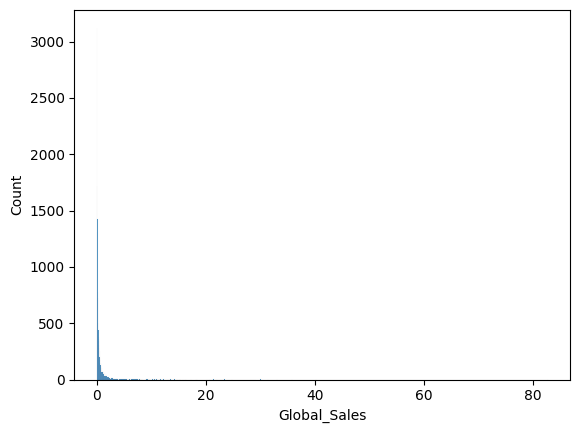

In [66]:
sns.histplot(df_work["Global_Sales"])

In [67]:
log_Global_Sales = np.log1p(df_work["Global_Sales"])

<Axes: xlabel='Global_Sales', ylabel='Count'>

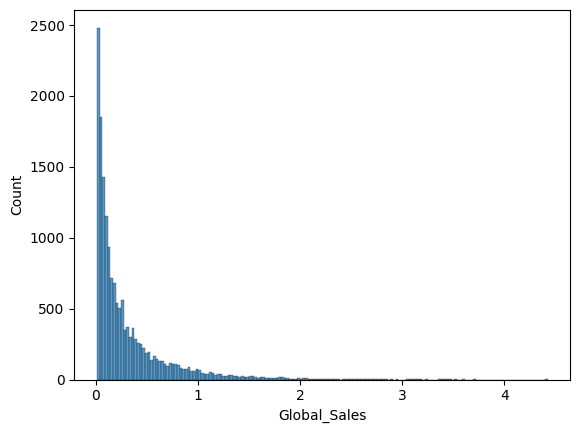

In [68]:
sns.histplot(log_Global_Sales)

После логарифмирования заметен long tail, а также выбросы

In [69]:
def del_outliers(column_):
    Q1 = column_.quantile(0.25)
    Q3 = column_.quantile(0.75)
    IQR = Q3 - Q1
    
    no_otls_col = column_[(column_ >= Q1 - 1.5 * IQR) &
                                    (column_ <= Q3 + 1.5 * IQR)]
    return no_otls_col

In [70]:
no_otls_log_Global_Sales = del_outliers(log_Global_Sales)

In [71]:
len(no_otls_log_Global_Sales)

15210

<Axes: xlabel='Global_Sales', ylabel='Count'>

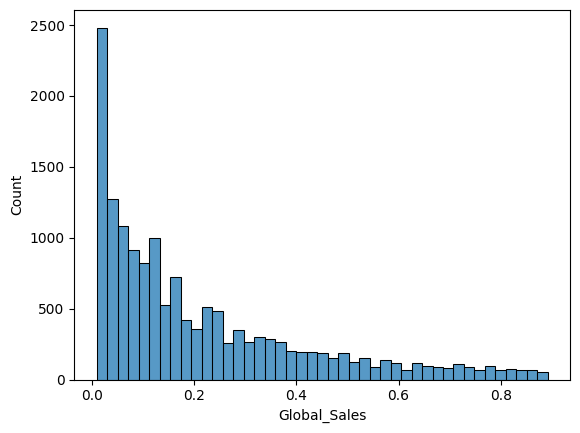

In [72]:
sns.histplot(no_otls_log_Global_Sales)

Такое распределение выглядит лучше.  
Теперь нужно логарифмировать все колонки продаж, удалить в них выбросы, а затем объединить в итоговый набор данных

In [73]:
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

for col in sales_cols:
    df_work[col] = np.log1p(df_work[col])

Понадобится несколько иная функция удаления выбросов, которая возвращает столбец с True или False, чтобы понимать, какие записи удалять:

In [74]:
def get_lines_to_del(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column >= lower_bound) & (column <= upper_bound)

In [75]:
clear_sales = df_work[sales_cols].apply(get_lines_to_del)

In [76]:
clear_sales.isna().sum()

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [77]:
common_idxs = clear_sales.all(axis=1)

In [78]:
df_work_clear = df_work[common_idxs]

In [79]:
len(df_work_clear)

12128

Теперь можно не переживать насчёт количества выбросов и неправильного распределения

Можно заменить колонку с годом на разницу с числом 2023, чтобы числа столбца были сопоставимы с другими:

In [80]:
df_work_clear.Year =  2023 - df_work_clear.Year

In [81]:
df_work_clear.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Are_NA_Sales,Are_EU_Sales,Are_JP_Sales,Are_Other_Sales
1942,1944,6,13.0,5,71,0.512824,0.254642,0.009950,0.095310,0.722706,True,True,True,True
2008,2010,18,13.0,8,48,0.518794,0.239017,0.000000,0.086178,0.712950,True,True,False,True
2045,2047,6,15.0,5,327,0.500775,0.198851,0.048790,0.095310,0.698135,True,True,True,True
2062,2064,20,26.0,3,384,0.488580,0.223144,0.086178,0.029559,0.693147,True,True,True,True
2078,2080,6,12.0,6,276,0.494696,0.246860,0.000000,0.076961,0.693147,True,True,False,True


Итоговая тепловая карта корреляции:

<Axes: >

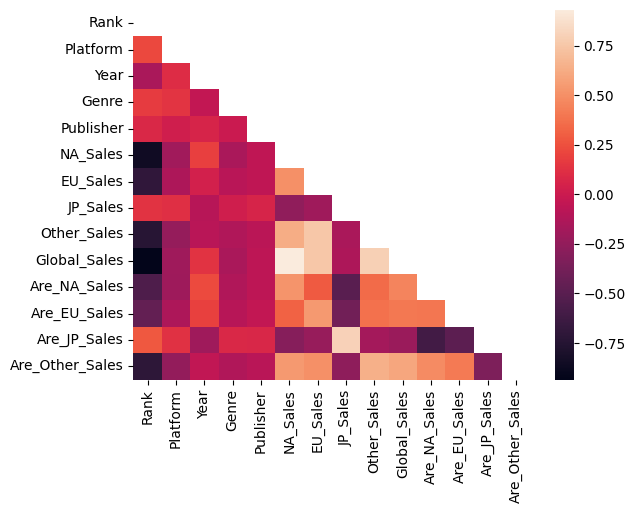

In [82]:
upper_matrix = np.triu(df_work_clear.corr())
sns.heatmap(df_work_clear.corr(), annot=True, mask=upper_matrix)

Так как в качестве целевой переменной для предсказания выбран столбец Global_Sales, нужно посмотреть корреляцию остальных столбцов с ним и, возможно, удалить те, корреляция которых близка к нулю:

In [83]:
df_work_clear.corr()["Global_Sales"].drop(["Global_Sales"], axis=0).sort_values()

Rank              -0.934581
Are_JP_Sales      -0.218990
Platform          -0.195793
Genre             -0.149566
JP_Sales          -0.140058
Publisher         -0.061537
Year               0.129635
Are_EU_Sales       0.404444
Are_NA_Sales       0.451720
Are_Other_Sales    0.601801
EU_Sales           0.755266
Other_Sales        0.795925
NA_Sales           0.930541
Name: Global_Sales, dtype: float64

Наименьшая корреляция наблюдается у издателя, но она не настолько мала, чтобы её удалять

Но что точно необходимо удалить, так это: ранг и всю информацию о продажах. Это необходимо, так как на новых данных, например, если хочется узнать ожидаемые мировые продажи, такой информации не будет. Скорее всего, будут доступны только: платформа, жанр, издатель и год выпуска.  

Удаление столбцов не означает, что они бесполезны. Итоговый очищенный датасет df_work_clear полезен для анализа обработанных данных, а также позволяет построить модели прогнозирования не по одному столбцу с глобальными продажами, а сразу по 10. Значит, датасет очень даже полезен.  

Но дальше я обучу модель для предсказания именно мировых продаж, а значит, удалю остальные столбцы с метаданными:

In [84]:
leak_columns = ["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Are_NA_Sales", "Are_EU_Sales", "Are_JP_Sales", "Are_Other_Sales"]

In [85]:
df_final = df_work_clear.drop(leak_columns, axis=1)

In [86]:
df_final.head()

,Platform,Year,Genre,Publisher,Global_Sales
1942,6,13.0,5,71,0.722706
2008,18,13.0,8,48,0.712950
2045,6,15.0,5,327,0.698135
2062,20,26.0,3,384,0.693147
2078,6,12.0,6,276,0.693147


На данном этапе работа завершена

# Гипотезы

Как было замечено ранее, так как столбцы с продажами имеют смещение, необходимо использовать те алгоритмы прогнозирования, которые умеют работать со смещением. Я проверю 3: случайный лес, регрессию Лассо и Эластичную сеть из библиотеки sklearn. После сравню результаты и выберу лучшую.  

Но сначала нужно разделить датасет на тренировочные и тестовые данные, чтобы была возможность измерить точность:

In [87]:
X = df_final.drop(["Global_Sales"], axis=1)
y = df_final["Global_Sales"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [89]:
X_train.shape

(8489, 4)

In [90]:
X_test.shape

(3639, 4)

In [91]:
models = [RandomForestRegressor(n_estimators=200, random_state=0),
          Lasso(alpha=0.01),
          ElasticNet(alpha=0.01, l1_ratio=0.5)]

In [92]:
for model in models:
    print("Алгоритм: ", model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Ошибка: ", mean_absolute_error(y_pred, y_test))

Алгоритм:  RandomForestRegressor(n_estimators=200, random_state=0)
Ошибка:  0.09463200186237351
Алгоритм:  Lasso(alpha=0.01)
Ошибка:  0.10450235299314944
Алгоритм:  ElasticNet(alpha=0.01)
Ошибка:  0.10435031942931161


Наименьшая ошибка оказалась у алгоритма случайного леса. Можно попробовать оптимизировать его параметры. Для этого я воспользуюсь GridSearchCV. Этот алгоритм позволяет перебрать комбинации параметров, сравнить результат с помощью кросс-валидации и получить лучшую модель

In [93]:
params_grid = {'n_estimators': [50, 100, 200, 250, 300],
               'max_depth': [None, 10, 20, 30, 50],
               'min_samples_split': [2, 3, 4, 5, 10, 15]
              }

In [94]:
model = RandomForestRegressor(random_state=0)

gs = GridSearchCV(estimator=model, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_split': [2, 3, 4, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [95]:
gs.best_params_

{'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 300}

In [96]:
model = RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=300, random_state=0)

In [97]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=300,
                      random_state=0)

In [98]:
y_pred = model.predict(X_test)
print("Ошибка: ", mean_absolute_error(y_pred, y_test))

Ошибка:  0.09002462152863416


Результат стал на 0.004 лучше

Теперь предстоит выяснить, насколько результат хороший/плохой, так как полученное число слишком абстрактно.  
Ранее были проведены некоторые преобразования, изменившие столбцы с продажами, а именно, взят натуральный логарифм из каждого числа. Для того, чтобы понять истинный размер ошибки, нужно восстановить результат с помощью функции np.expm1

In [99]:
mae = mean_absolute_error(y_pred, y_test)
np.expm1(mae)

0.09420122428032508

Теперь нужно получить среднее всех значений и исходя из этого понять размер ошибки:

In [100]:
mean = df_final.Global_Sales.mean()
np.expm1(mean)

0.1623218354220663

In [101]:
np.expm1(mae) / np.expm1(mean)

0.5803361207405323

58% ошибочных данных. Что значит, что больше, чем в половине случаев модель будет выдавать результат с отклонением в 0.09. Если для тестовых данных с большим значением глобальных продаж эта ошибка относительно незначительна, то с маленькими значениями будет заметное отклонение. С другой стороны, такую модель можно использовать в сервисах, где не важна точная оценка прогноза продаж. Возможно, если бы в изначальных данных были более большие и целые значения продаж с распределением, близкому к нормальному, можно было бы получить намного более высокую точность предсказаний, но с такими неравномерными данными результат можно считать неплохим

In [103]:
import sklearn

In [104]:
sklearn.__version__

'1.3.1'